In [54]:
%matplotlib inline

import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
 

import json
import requests
from pprint import pprint

import os
import sys

<h2>Scraping Base Data (Top 100 Grossing Movies)

In [15]:
# Scrape the base data from the-numbers.com (for Top 100 Grossing Movies)
response = requests.get("https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time")
base_df_1 = pd.read_html(response.text)[0]
base_df_2 = pd.read_html(response.text)[1]
base_df = base_df_1.append(base_df_2).reset_index(drop=True)

# Fix cut off titles
base_df = base_df.replace(base_df.iloc[74]['Movie'], 'Pirates of the Caribbean: The Curse of the Black Pearl')
base_df = base_df.replace(base_df.iloc[87]['Movie'], 'The Chronicles of Narnia: The Lion, the Witch and the Wardrobe')

base_df = base_df.rename(columns = {"Movie":"title"})

base_df.head()

,Rank,Released,title,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,2015,Star Wars Ep. VII: The Force Awakens,"$936,662,225","$1,116,648,995","$2,053,311,220"
1,2,2009,Avatar,"$760,507,625","$2,015,837,654","$2,776,345,279"
2,3,2018,Black Panther,"$700,059,566","$648,300,000","$1,348,359,566"
3,4,2018,Avengers: Infinity War,"$678,815,482","$1,369,988,242","$2,048,803,724"
4,5,1997,Titanic,"$659,363,944","$1,548,844,451","$2,208,208,395"


In [16]:
#Extra API key: cd87cd45
url = 'http://www.omdbapi.com/?apikey=8cc26962&r=json'

In [17]:
imdb_dicts=[]
from pprint import pprint

for index, row in base_df.iterrows():

    title = row['title']
    year = row['Released']
    
    title = title.replace('â', '\'')
    
    # Change title formatting to IMDB formatting for special cases
    '''
    Star Wars Ep. VII: The Force Awakens 2015
    Star Wars Ep. VIII: The Last Jedi 2017
    Star Wars Ep. I: The Phantom Menace 1999
    Star Wars Ep. IV: A New Hope 1977
    Star Wars Ep. III: Revenge of the Sith 2005
    Star Wars Ep. II: Attack of the Clones 2002
    Star Wars Ep. VI: Return of the Jedi 1983
    Star Wars Ep. V: The Empire Strikes Back 1980
    # IMDB Format: Star Wars: Episode IV - A New Hope

    Pirates of the Caribbean: Dead Manâs Chest 2006
    Pirates of the Caribbean: At Worldâs End 2007
    # IMDB Format: Pirates of the Caribbean: Dead Man's Chest

    Harry Potter and the Deathly Hallows: Part II 2011
    Harry Potter and the Sorcererâs Stone 2001
    Harry Potter and the Deathly Hallows: Part I 2010
    # IMDB Format: Harry Potter and the Deathly Hallows: Part 2
    '''
    if 'Star Wars' in title:
        title = title.replace('Ep.', 'Episode').replace(':', ' -')
        if 'Episode VII ' in title:
            title = 'Star Wars: Episode VII'
    
    if 'Harry Potter' in title:
        if 'II' in title:
            title = title.replace('II', '2')
        elif 'I' in title:
            title = title.replace('I', '1')
        
    try: 
        query_url = f"{url}&t={title}&y={year}"
        omdb_dict = requests.get(query_url).json()

        imdb_title= omdb_dict['Title']
        imdb_year = omdb_dict['Year']
        imdb_genre = omdb_dict['Genre']
        imdb_director = omdb_dict['Director']
        imdb_actor = omdb_dict['Actors']
        imdb_writer = omdb_dict['Writer']
        imdb_language = omdb_dict['Language']
        imdb_country = omdb_dict['Country']
        imdb_rating = omdb_dict['Ratings']
        imdb_awards = omdb_dict['Awards']
        imdb_metascore = omdb_dict['Metascore']
        imdb_imdbrating = omdb_dict['imdbRating']
        imdb_imdbvotes = omdb_dict['imdbVotes']
        imdb_imdbID = omdb_dict['imdbID']
        imdb_imdbtype = omdb_dict['Type']
        imdb_boxoffice = omdb_dict['BoxOffice']
        imdb_production = omdb_dict['Production']
        imdb_dicts.append({"Title":imdb_title,
                          "Year":imdb_year,
                          "Genre":imdb_genre,
                          "Director":imdb_director,
                          "Actors":imdb_actor,
                          "Writer":imdb_writer,
                          "Language":imdb_language,
                          "Country":imdb_country,
                          "Awards":imdb_awards,
                          "imdbRating":imdb_imdbrating,
                          "imdbVotes":imdb_imdbvotes,
                          "imdbID":imdb_imdbID,
                          "Type":imdb_imdbtype,
                          "Box_office":imdb_boxoffice,
                          "Studio":imdb_production})
    except:
        print(title, year)
    
pprint(imdb_dicts)

[{'Actors': 'Freddie Kuguru',
  'Awards': 'N/A',
  'Box_office': 'N/A',
  'Country': 'USA',
  'Director': 'N/A',
  'Genre': 'Short',
  'Language': 'English',
  'Studio': 'N/A',
  'Title': 'Star Wars: Episode VII - Toys',
  'Type': 'movie',
  'Writer': 'N/A',
  'Year': '2015',
  'imdbID': 'tt5377194',
  'imdbRating': 'N/A',
  'imdbVotes': 'N/A'},
 {'Actors': 'Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang',
  'Awards': 'Won 3 Oscars. Another 85 wins & 128 nominations.',
  'Box_office': '$749,700,000',
  'Country': 'UK, USA',
  'Director': 'James Cameron',
  'Genre': 'Action, Adventure, Fantasy, Sci-Fi',
  'Language': 'English, Spanish',
  'Studio': '20th Century Fox',
  'Title': 'Avatar',
  'Type': 'movie',
  'Writer': 'James Cameron',
  'Year': '2009',
  'imdbID': 'tt0499549',
  'imdbRating': '7.8',
  'imdbVotes': '1,013,715'},
 {'Actors': "Chadwick Boseman, Michael B. Jordan, Lupita Nyong'o, Danai Gurira",
  'Awards': '14 nominations.',
  'Box_office': '$501,105,037',
  

  'imdbID': 'tt1399103',
  'imdbRating': '6.3',
  'imdbVotes': '360,510'},
 {'Actors': 'Bradley Cooper, Kyle Gallner, Cole Konis, Ben Reed',
  'Awards': 'Won 1 Oscar. Another 23 wins & 42 nominations.',
  'Box_office': '$274,377,268',
  'Country': 'USA',
  'Director': 'Clint Eastwood',
  'Genre': 'Action, Biography, Drama, History, Thriller, War',
  'Language': 'English, Arabic',
  'Studio': 'Warner Bros.',
  'Title': 'American Sniper',
  'Type': 'movie',
  'Writer': 'Jason Hall, Chris Kyle (book), Scott McEwen (book), Jim DeFelice '
            '(book)',
  'Year': '2014',
  'imdbID': 'tt2179136',
  'imdbRating': '7.3',
  'imdbVotes': '391,759'},
 {'Actors': 'Bruce Allpress, Sean Astin, John Bach, Sala Baker',
  'Awards': 'Won 2 Oscars. Another 118 wins & 137 nominations.',
  'Box_office': '$339,700,000',
  'Country': 'New Zealand, USA',
  'Director': 'Peter Jackson',
  'Genre': 'Adventure, Drama, Fantasy',
  'Language': 'English, Sindarin, Old English',
  'Studio': 'New Line Cinema',


  'Type': 'movie',
  'Writer': 'Peter Craig (screenplay), Danny Strong (screenplay), Suzanne '
            'Collins (adaptation), Suzanne Collins (novel)',
  'Year': '2015',
  'imdbID': 'tt1951266',
  'imdbRating': '6.6',
  'imdbVotes': '241,696'},
 {'Actors': 'Ray Anthony, Christine Anu, Andy Arness, Alima Ashton-Sheibu',
  'Awards': '8 wins & 31 nominations.',
  'Box_office': '$281,500,000',
  'Country': 'USA',
  'Director': 'Lana Wachowski, Lilly Wachowski',
  'Genre': 'Action, Sci-Fi',
  'Language': 'English, French',
  'Studio': 'Warner Bros. Pictures',
  'Title': 'The Matrix Reloaded',
  'Type': 'movie',
  'Writer': 'Lilly Wachowski, Lana Wachowski, Lilly Wachowski (characters), '
            'Lana Wachowski (characters)',
  'Year': '2003',
  'imdbID': 'tt0234215',
  'imdbRating': '7.2',
  'imdbVotes': '469,313'},
 {'Actors': 'Taylor Lautner, Gil Birmingham, Billy Burke, Sarah Clarke',
  'Awards': '11 wins & 22 nominations.',
  'Box_office': '$281,267,663',
  'Country': 'USA',
  

In [18]:
df= pd.DataFrame.from_dict(imdb_dicts)
df.head()

,Actors,Awards,Box_office,Country,Director,Genre,Language,Studio,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,Freddie Kuguru,N/A,N/A,USA,N/A,Short,English,N/A,Star Wars: Episode VII - Toys,movie,N/A,2015,tt5377194,N/A,N/A
1,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Won 3 Oscars. Another 85 wins & 128 nominations.,"$749,700,000","UK, USA",James Cameron,"Action, Adventure, Fantasy, Sci-Fi","English, Spanish",20th Century Fox,Avatar,movie,James Cameron,2009,tt0499549,7.8,"1,013,715"
2,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...",14 nominations.,"$501,105,037","USA, South Africa, South Korea, Australia",Ryan Coogler,"Action, Adventure, Sci-Fi","Swahili, Nama, English, Xhosa, Korean",Marvel Studios,Black Panther,movie,"Ryan Coogler, Joe Robert Cole, Stan Lee (based...",2018,tt1825683,7.4,"430,289"
3,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",N/A,"$664,987,816",USA,"Anthony Russo, Joe Russo","Action, Adventure, Fantasy, Sci-Fi",English,Walt Disney Pictures,Avengers: Infinity War,movie,"Christopher Markus (screenplay by), Stephen Mc...",2018,tt4154756,8.5,"550,743"
4,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",Won 11 Oscars. Another 111 wins & 77 nominations.,N/A,USA,James Cameron,"Drama, Romance","English, Swedish",Paramount Pictures,Titanic,movie,James Cameron,1997,tt0120338,7.8,"926,635"


In [19]:
Rating= df.sort_values(by=['imdbRating'],ascending=False)
Rating.head(10)

,Actors,Awards,Box_office,Country,Director,Genre,Language,Studio,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,Freddie Kuguru,N/A,N/A,USA,N/A,Short,English,N/A,Star Wars: Episode VII - Toys,movie,N/A,2015,tt5377194,N/A,N/A
9,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 152 wins & 155 nominations.,"$533,316,061","USA, UK",Christopher Nolan,"Action, Crime, Drama, Thriller","English, Mandarin",Warner Bros. Pictures/Legendary,The Dark Knight,movie,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,tt0468569,9.0,"2,005,606"
37,"Noel Appleby, Ali Astin, Sean Astin, David Aston",Won 11 Oscars. Another 197 wins & 122 nominati...,"$364,000,000","New Zealand, USA",Peter Jackson,"Action, Adventure, Drama, Fantasy","English, Quenya, Old English, Sindarin",New Line Cinema,The Lord of the Rings: The Return of the King,movie,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...",2003,tt0167260,8.9,"1,451,338"
84,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",Won 4 Oscars. Another 152 wins & 204 nominations.,"$292,568,851","USA, UK",Christopher Nolan,"Action, Adventure, Sci-Fi, Thriller","English, Japanese, French",Warner Bros. Pictures,Inception,movie,Christopher Nolan,2010,tt1375666,8.8,"1,779,523"
67,"Alan Howard, Noel Appleby, Sean Astin, Sala Baker",Won 4 Oscars. Another 113 wins & 123 nominations.,"$314,000,000","New Zealand, USA",Peter Jackson,"Adventure, Drama, Fantasy","English, Sindarin",New Line Cinema,The Lord of the Rings: The Fellowship of the Ring,movie,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...",2001,tt0120737,8.8,"1,466,530"
58,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Won 6 Oscars. Another 40 wins & 67 nominations.,"$330,000,000",USA,Robert Zemeckis,"Drama, Romance",English,Paramount Pictures,Forrest Gump,movie,"Winston Groom (novel), Eric Roth (screenplay)",1994,tt0109830,8.8,"1,550,175"
89,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",Won 1 Oscar. Another 21 wins & 19 nominations.,"$4,548,170",USA,Irvin Kershner,"Action, Adventure, Fantasy, Sci-Fi",English,Twentieth Century Fox,Star Wars: Episode V - The Empire Strikes Back,movie,"Leigh Brackett (screenplay by), Lawrence Kasda...",1980,tt0080684,8.8,"1,021,079"
49,"Bruce Allpress, Sean Astin, John Bach, Sala Baker",Won 2 Oscars. Another 118 wins & 137 nominations.,"$339,700,000","New Zealand, USA",Peter Jackson,"Adventure, Drama, Fantasy","English, Sindarin, Old English",New Line Cinema,The Lord of the Rings: The Two Towers,movie,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...",2002,tt0167261,8.7,"1,310,858"
14,"Mark Hamill, Harrison Ford, Carrie Fisher, Pet...",Won 6 Oscars. Another 50 wins & 28 nominations.,N/A,USA,George Lucas,"Action, Adventure, Fantasy, Sci-Fi",English,20th Century Fox,Star Wars: Episode IV - A New Hope,movie,George Lucas,1977,tt0076759,8.6,"1,092,532"
3,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",N/A,"$664,987,816",USA,"Anthony Russo, Joe Russo","Action, Adventure, Fantasy, Sci-Fi",English,Walt Disney Pictures,Avengers: Infinity War,movie,"Christopher Markus (screenplay by), Stephen Mc...",2018,tt4154756,8.5,"550,743"


In [20]:
top_10_imdb = Rating.head(10)
top_10_imdb

,Actors,Awards,Box_office,Country,Director,Genre,Language,Studio,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,Freddie Kuguru,N/A,N/A,USA,N/A,Short,English,N/A,Star Wars: Episode VII - Toys,movie,N/A,2015,tt5377194,N/A,N/A
9,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 152 wins & 155 nominations.,"$533,316,061","USA, UK",Christopher Nolan,"Action, Crime, Drama, Thriller","English, Mandarin",Warner Bros. Pictures/Legendary,The Dark Knight,movie,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,tt0468569,9.0,"2,005,606"
37,"Noel Appleby, Ali Astin, Sean Astin, David Aston",Won 11 Oscars. Another 197 wins & 122 nominati...,"$364,000,000","New Zealand, USA",Peter Jackson,"Action, Adventure, Drama, Fantasy","English, Quenya, Old English, Sindarin",New Line Cinema,The Lord of the Rings: The Return of the King,movie,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...",2003,tt0167260,8.9,"1,451,338"
84,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",Won 4 Oscars. Another 152 wins & 204 nominations.,"$292,568,851","USA, UK",Christopher Nolan,"Action, Adventure, Sci-Fi, Thriller","English, Japanese, French",Warner Bros. Pictures,Inception,movie,Christopher Nolan,2010,tt1375666,8.8,"1,779,523"
67,"Alan Howard, Noel Appleby, Sean Astin, Sala Baker",Won 4 Oscars. Another 113 wins & 123 nominations.,"$314,000,000","New Zealand, USA",Peter Jackson,"Adventure, Drama, Fantasy","English, Sindarin",New Line Cinema,The Lord of the Rings: The Fellowship of the Ring,movie,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...",2001,tt0120737,8.8,"1,466,530"
58,"Tom Hanks, Rebecca Williams, Sally Field, Mich...",Won 6 Oscars. Another 40 wins & 67 nominations.,"$330,000,000",USA,Robert Zemeckis,"Drama, Romance",English,Paramount Pictures,Forrest Gump,movie,"Winston Groom (novel), Eric Roth (screenplay)",1994,tt0109830,8.8,"1,550,175"
89,"Mark Hamill, Harrison Ford, Carrie Fisher, Bil...",Won 1 Oscar. Another 21 wins & 19 nominations.,"$4,548,170",USA,Irvin Kershner,"Action, Adventure, Fantasy, Sci-Fi",English,Twentieth Century Fox,Star Wars: Episode V - The Empire Strikes Back,movie,"Leigh Brackett (screenplay by), Lawrence Kasda...",1980,tt0080684,8.8,"1,021,079"
49,"Bruce Allpress, Sean Astin, John Bach, Sala Baker",Won 2 Oscars. Another 118 wins & 137 nominations.,"$339,700,000","New Zealand, USA",Peter Jackson,"Adventure, Drama, Fantasy","English, Sindarin, Old English",New Line Cinema,The Lord of the Rings: The Two Towers,movie,"J.R.R. Tolkien (novel), Fran Walsh (screenplay...",2002,tt0167261,8.7,"1,310,858"
14,"Mark Hamill, Harrison Ford, Carrie Fisher, Pet...",Won 6 Oscars. Another 50 wins & 28 nominations.,N/A,USA,George Lucas,"Action, Adventure, Fantasy, Sci-Fi",English,20th Century Fox,Star Wars: Episode IV - A New Hope,movie,George Lucas,1977,tt0076759,8.6,"1,092,532"
3,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",N/A,"$664,987,816",USA,"Anthony Russo, Joe Russo","Action, Adventure, Fantasy, Sci-Fi",English,Walt Disney Pictures,Avengers: Infinity War,movie,"Christopher Markus (screenplay by), Stephen Mc...",2018,tt4154756,8.5,"550,743"


In [21]:
meta_critic= pd.read_csv(r'C:\Users\Owner\Desktop\Python\Project2\metacsv.csv')

meta_critic



,Unnamed: 0,Rank,Released,title,DomesticBox Office,InternationalBox Office,WorldwideBox Office,release_date,critic_score,user_score,studio,director,main_cast,genres,parental_rating,runtime
0,0,1,2015,Star Wars Ep. VII: The Force Awakens,936662225,1116648,2053311,"December 18, 2015",81,6.8,Walt Disney Studios Motion Pictures,J.J. Abrams,"['Adam Driver', ' Carrie Fisher', ' Daisy Ridl...","['Action', 'Adventure', 'Sci-Fi', 'Fantasy']",PG-13,135 min
1,1,2,2009,Avatar,760507625,2015837,2776345,"December 18, 2009",83,7.5,Twentieth Century Fox Film Corporation,James Cameron,"['Michelle Rodriguez', ' Sam Worthington', ' S...","['Action', 'Adventure', 'Sci-Fi', 'Fantasy']",PG-13,162 min
2,2,3,2018,Black Panther,700059566,648300000,1348359,"February 16, 2018",88,6.6,Walt Disney Studios Motion Pictures,Ryan Coogler,"['Andy Serkis', ' Angela Bassett', ' Chadwick ...","['Action', 'Adventure', 'Sci-Fi', 'Drama']",PG-13,134 min
3,3,4,2018,Avengers: Infinity War,678815482,1369988,2048803,"April 27, 2018",68,8.6,Walt Disney Studios Motion Pictures,Anthony Russo and Joe Russo,"['Angela Bassett', ' Benedict Cumberbatch', ' ...","['Action', 'Adventure', 'Sci-Fi', 'Fantasy']",PG-13,149 min
4,4,5,1997,Titanic,659363944,1548844,2208208,"December 19, 1997",75,8.5,Paramount Pictures,James Cameron,"['Kate Winslet', ' Leonardo DiCaprio']","['Drama', 'Romance']",PG-13,194 min
5,5,6,2015,Jurassic World,652270625,996584239,1648854,"June 12, 2015",59,6.8,Universal Pictures,Colin Trevorrow,"['B.D. Wong', ' BD Wong', ' Bryce Dallas Howar...","['Action', 'Adventure', 'Sci-Fi', 'Thriller']",PG-13,124 min
6,6,7,2012,The Avengers,623279547,894656350,1517935,"May 4, 2012",69,8.0,Walt Disney Studios Motion Pictures,Joss Whedon,"['Chris Evans', ' Jeremy Renner', ' Robert Dow...","['Action', 'Adventure', 'Sci-Fi', 'Thriller']",PG-13,143 min
7,7,8,2017,Star Wars Ep. VIII: The Last Jedi,620181382,696583402,1316764,"December 15, 2017",85,4.5,Walt Disney Studios Motion Pictures,Rian Johnson,"['Adam Driver', ' Andy Serkis', ' Anthony Dani...","['Action', 'Adventure', 'Sci-Fi', 'Fantasy']",PG-13,152 min
8,8,9,2018,Incredibles 2,608581744,634000000,1242581,"June 15, 2018",80,8.0,Walt Disney Studios Motion Pictures,Brad Bird,"['Bob Odenkirk', ' Brad Bird', ' Catherine Kee...","['Action', 'Adventure', 'Sci-Fi', 'Comedy', 'A...",PG,118 min
9,9,10,2008,The Dark Knight,533720947,468275260,1001996,"July 18, 2008",84,8.9,Warner Bros. Pictures,Christopher Nolan,"['Aaron Eckhart', ' Christian Bale', ' Heath L...","['Action', 'Drama', 'Thriller', 'Crime']",PG-13,152 min


In [22]:
top_10_meta=meta_critic.head(10)

In [23]:
# Create a dataframe with selected columns.

plot_data_imdb= top_10_imdb[['Title', 'imdbRating']]
#add rank column to the imdb dataframe.
rank =['1','2','3','4','5','6','7','8','9','10']
se= pd.Series(rank)
plot_data_imdb['Rank']=se.values

#plot_data_imdb = plot_data_imdb['Rank'].astype(int)
#plot_data_imdb.Rank.astype(int)

# select columns from metacritic data frame.

plot_data_meta = meta_critic[["Rank","title" ]]
#print(plot_data_imdb)
#plot_data_meta.Rank.astype(int)

plot_data_imdb


C:\Intel\New folder\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Title,imdbRating,Rank
0,Star Wars: Episode VII - Toys,N/A,1
9,The Dark Knight,9.0,2
37,The Lord of the Rings: The Return of the King,8.9,3
84,Inception,8.8,4
67,The Lord of the Rings: The Fellowship of the Ring,8.8,5
58,Forrest Gump,8.8,6
89,Star Wars: Episode V - The Empire Strikes Back,8.8,7
49,The Lord of the Rings: The Two Towers,8.7,8
14,Star Wars: Episode IV - A New Hope,8.6,9
3,Avengers: Infinity War,8.5,10


In [82]:
# Getting rotton tomatoes data
rot_tom = pd.read_csv(r'C:\Users\Owner\Desktop\Python\Project2\rot_tom_data.csv')
rot_tom

,cretic(%),cretic_count,cretic_fresh,cretic_rate,cretic_rot,user(%),user_number,user_rate,name,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,93,403,374,8.2/10,29,87,"229,322",4.3/5,Star Wars Ep. VII: The Force Awakens,NaN,NaN,NaN,NaN
1,82,303,249,7.4/10,54,82,"1,381,863",4.1/5,Avatar,NaN,NaN,NaN,NaN
2,97,444,430,8.2/10,14,79,"84,175",4.1/5,Black Panther,NaN,NaN,NaN,NaN
3,84,407,344,7.5/10,63,91,"51,037",4.5/5,Avengers: Infinity War,NaN,NaN,NaN,NaN
4,89,184,163,8.0/10,21,69,"35,797,356",3.3/5,Titanic,NaN,NaN,NaN,NaN
5,71,323,230,6.7/10,93,78,"224,995",3.9/5,Jurassic World,NaN,NaN,NaN,NaN
6,92,340,313,8.0/10,27,91,"1,133,144",4.4/5,The Avengers,NaN,NaN,NaN,NaN
7,97,419,381,8.1/10,38,45,"204,091",2.8/5,Star Wars Ep. VIII: The Last Jedi,NaN,NaN,NaN,NaN
8,94,333,312,7.8/10,21,86,"16,103",4.2/5,Incredibles 2,NaN,NaN,NaN,NaN
9,94,332,312,8.6/10,20,94,"1,830,714",4.4/5,The Dark Knight,NaN,NaN,NaN,NaN


In [96]:
user_score=rot_tom.user_rate.str.replace("/5", " ")

pd.to_numeric(user_score)

title = rot_tom['name']

user_score*2


critic_score= rot_tom.cretic_rate.str.replace("/10", " ")
user_score

rot_tom_plot = {"user_score": user_score,
                "critic_score":critic_score,
                "title":title
               }

In [99]:
df= pd.DataFrame(rot_tom_plot)
df

,user_score,critic_score,title
0,4.3,8.2,Star Wars Ep. VII: The Force Awakens
1,4.1,7.4,Avatar
2,4.1,8.2,Black Panther
3,4.5,7.5,Avengers: Infinity War
4,3.3,8.0,Titanic
5,3.9,6.7,Jurassic World
6,4.4,8.0,The Avengers
7,2.8,8.1,Star Wars Ep. VIII: The Last Jedi
8,4.2,7.8,Incredibles 2
9,4.4,8.6,The Dark Knight


In [74]:
ax=sns.barplot(x=plot_data_meta['Rank'], y=plot_data_meta['title'])

NameError: name 'sns' is not defined

C:\Intel\New folder\lib\site-packages\matplotlib\tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


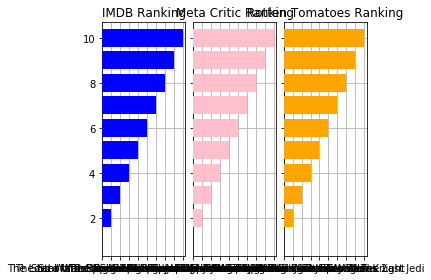

In [25]:
y= plot_data_meta['Rank']
imdb = plot_data_imdb['Title']
metaCritic= plot_data_meta['title']

fig,axes = plt.subplots(ncols=3,sharey=True)
axes[0].barh(y,imdb,align='center',color='blue',zorder=10)
axes[0].set(title='IMDB Ranking')
axes[1].barh(y, metaCritic, align='center', color='pink', zorder=10)
axes[1].set(title='Meta Critic Ranking')
axes[2].barh(y, metaCritic, align='center', color='orange', zorder=10)
axes[2].set(title='Rotten Tomatoes Ranking')

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()



In [40]:
#Divide critic score by 10 to align with User's score
Critic_Score = top_10_meta["critic_score"].div(10)
# Choose the selected columns from meta critic data frame
Compare_score = top_10_meta[["title", "user_score" ]]

#Add a critic score to the dataframe

Compare_score['Critic_Score']= Critic_Score

Compare_score

C:\Intel\New folder\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,title,user_score,Critic_Score
0,Star Wars Ep. VII: The Force Awakens,6.8,8.1
1,Avatar,7.5,8.3
2,Black Panther,6.6,8.8
3,Avengers: Infinity War,8.6,6.8
4,Titanic,8.5,7.5
5,Jurassic World,6.8,5.9
6,The Avengers,8.0,6.9
7,Star Wars Ep. VIII: The Last Jedi,4.5,8.5
8,Incredibles 2,8.0,8.0
9,The Dark Knight,8.9,8.4


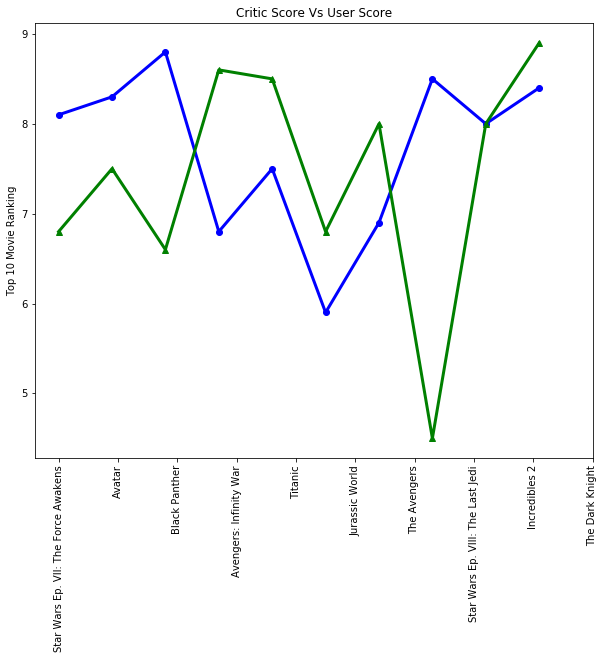

In [73]:
# Creating user vs critic graph
plt.figure(figsize =(10,8))
plt.plot(Compare_score['title'],Compare_score['Critic_Score'], marker= 'o', color= 'blue', linewidth=3)
plt.plot(Compare_score['title'],Compare_score['user_score'], marker= '^', color= 'green', linewidth=3)
plt.title("Critic Score Vs User Score")
plt.ylabel('Top 10 Movie Ranking')
x=[0,1,2,3,4,5,6,7,8,9,10]
#plt.xticks(range(x))
#plt.xticks(x,top_10_meta['title'],rotation = '45')
#plt.subplots_adjust(bottom=0.15)
plt.xticks(np.linspace(0,10,10),Compare_score['title'], rotation='vertical')

plt.show()


In [ ]:
np